In [1]:
import sys
sys.path.append("/Users/david/Documents/code/fhmm/v1")

In [2]:
from importlib import reload

import src.ads_davidjames9610.ads as myads

from collections import Counter
import numpy as np
import librosa
import matplotlib.pyplot as plt
import os.path

import pandas as pd
import src.misc_davidjames9610.get_data as get_data
import src.misc_davidjames9610.annotations as annot
import src.misc_davidjames9610.proc_methods as proc
from constants import *
import importlib
importlib.reload(get_data)
importlib.reload(annot)

from python_speech_features import mfcc, delta
from spafe.utils import vis

import IPython
from scipy.io import wavfile

In [3]:
audio, base_sr = librosa.load(BRD_VRS_DATA)
print(base_sr)

22050


In [5]:
# from whale.setup import get_data, const, annotations
# import importlib
# importlib.reload(const)

importlib.reload(get_data)

# const for fe and what not
fs = 22050

labels_set = [
'WHALE',
'NOISE',
# 'LOW_MOO',
# 'PULSE',
# 'SWOOP',
# 'NOISE'
]
num_to_label = {i: labels_set[i] for i in range(len(labels_set))}
label_to_num = {labels_set[i] : i for i in range(len(labels_set))}

get_data_dict = {
    'WHALE': [
        get_data.GetDataSimple(HPB_WTK_DATA, HPB_WTK_LABEL_ALL, fs, proc.file_to_audio),
        # get_data.GetDataSimple(HPB_MBY_DATA, HPB_MBY_LABEL_MOO, fs, proc.file_to_audio),
        # get_data.GetDataSimple(HPB_MBY_DATA, HPB_MBY_LABEL_HIGH_MOO, fs, proc.file_to_audio),
        # get_data.GetDataSimple(HPB_MBY_DATA, HPB_MBY_LABEL_LOW_MOO, fs, proc.file_to_audio),
        # get_data.GetDataSimple(HPB_MBY_DATA, HPB_MBY_LABEL_PULSE, fs, proc.file_to_audio),
        # get_data.GetDataSimple(HPB_MBY_DATA, HPB_MBY_LABEL_SWOOP, fs, proc.file_to_audio)
    ],
    'NOISE': [get_data.GetDataSimple(HPB_WTK_DATA,HPB_WTK_NOISE, fs, proc.file_to_audio)],
}

samples, labels = get_data.get_samples(get_data_dict, labels_set, label_to_num)

print(np.any([len(sample) == 0 for sample in samples]))

__collected samples__
WHALE :  76
NOISE :  14
False


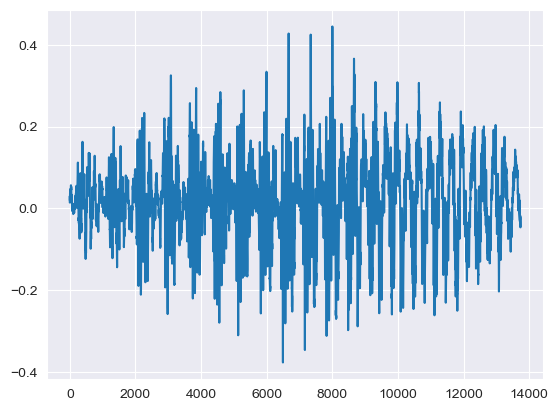

In [8]:
plt.plot(samples[5])

In [9]:
import pickle
pickle.dump({
    'samples': samples,
    'labels': labels,
    'labels_set': labels_set,
    'num_to_label': num_to_label,
    'label_to_num': label_to_num,
    'fs': fs
}, open('samples_labels.pickle','wb'))